In [1]:
# 1 Importing Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display max columns (watch out for match df over 200K rows x 100+ columns)
#pd.set_option('display.max_rows', None)

In [2]:
# 2 Loading Data Sets

champs = df1= pd.read_excel("Data-Sets/Champions-2024.xlsx",).round(1)
match = df2 = pd.read_csv("Data-Sets/lol_match_data.csv",).round(1)

# 2A Champion Details (Can Skip)
# https://www.kaggle.com/datasets/gabkgonzales/league-of-legends-dataset

champs

# 2B Match Data (Can Skip)
# Link - https://www.kaggle.com/datasets/mldatastudent/league-of-legends-match-data (Big File)

match



,match_matchId,match_gameStartTimestamp,match_gameEndTimestamp,match_gameDuration,match_mapId,match_platformId,player_puuid,player_teamId,player_teamPosition,player_lane,...,player_item3_categories,player_item3_priceTotal,player_item4_name,player_item4_description,player_item4_categories,player_item4_priceTotal,player_item5_name,player_item5_description,player_item5_categories,player_item5_priceTotal
0,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,QPstXBo4FWSoly8yTtzmHFjsgtwUJrVzRhFTWlO3irBaEd...,blue,TOP,JUNGLE,...,"['Health', 'Damage', 'CooldownReduction', 'Abi...",3100,Sterak's Gage,<mainText><stats><attention> 400</attention> H...,"['Health', 'Damage', 'Tenacity']",3200,Stealth Ward,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Jungle', 'Lane', 'Trinket', 'Vision']",0
1,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,QzyPH9vc2hbRPURIrgqsSCO433YtjtgkMFE9e1H9_c351N...,blue,JUNGLE,JUNGLE,...,"['Armor', 'Boots']",1000,Sundered Sky,<mainText><stats><attention> 45</attention> At...,"['Health', 'Damage', 'CooldownReduction', 'Abi...",3100,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
2,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,YuVhOcfatPV1SXJXC13Rq0WnzmlZOaarfRNj_cq0LPPn4k...,blue,MIDDLE,MIDDLE,...,"['Boots', 'MagicPenetration']",1100,Doran's Ring,<mainText><stats><attention> 18</attention> Ab...,"['Health', 'Lane', 'ManaRegen', 'SpellDamage']",400,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
3,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,MX4cgaNMIE7mc0yui4eWbJiR2oY7NHQiqKyOnZuYaG5_Np...,blue,BOTTOM,BOTTOM,...,"['AttackSpeed', 'Boots']",1100,Statikk Shiv,<mainText><stats><attention> 55</attention> At...,"['Damage', 'AttackSpeed', 'OnHit', 'NonbootsMo...",2800,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
4,LA1_1531159804,1.720820e+12,1.720820e+12,1834.0,11.0,LA1,b3imXxVO7QIdV2svkLrD9KUBxPYFvCQMnIinyVGBz7tbDd...,blue,UTILITY,BOTTOM,...,['Armor'],300,Cloth Armor,<mainText><stats><attention> 15</attention> Ar...,['Armor'],300,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205105,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,v6u_FhRreY-ZLdgHD7dWYBV_IXsb7dqPIPBSbwCKbr0KVJ...,red,TOP,TOP,...,"['AttackSpeed', 'Boots']",1100,Immortal Shieldbow,<mainText><stats><attention> 55</attention> At...,"['Damage', 'CriticalStrike']",3000,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
205106,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,WFOrSTTv1PTUGVOG5X014vDOlsDSZQlh9Bbn9Jnp3QOfzT...,red,JUNGLE,JUNGLE,...,"['Health', 'SpellDamage']",3000,Rylai's Crystal Scepter,<mainText><stats><attention> 75</attention> Ab...,"['Health', 'SpellDamage', 'Slow']",2600,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
205107,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,htPUrnuZc_NLcd5GTeuWpTzWD47Z_b-xFkmvPPMd63j-24...,red,MIDDLE,MIDDLE,...,"['Health', 'Damage', 'SpellVamp', 'Lane']",450,Bloodthirster,<mainText><stats><attention> 80</attention> At...,"['Damage', 'LifeSteal']",3400,Oracle Lens,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0
205108,KR_7237060555,1.724337e+12,1.724339e+12,1851.0,11.0,KR,qqUpt5aAAcx450pGLlbZTK6PSRRBeG1FwUbF-wrHYlnD3P...,red,BOTTOM,BOTTOM,...,"['Health', 'Armor', 'Aura', 'AbilityHaste']",2700,"Jak'Sho, The Protean",<mainText><stats><attention> 300</attention> H...,"['Health', 'SpellBlock', 'Armor', 'MagicResist']",3200,Farsight Alteration,<mainText><stats></stats><br><br> <active>ACTI...,"['Active', 'Trinket', 'Vision']",0


In [3]:
# 3 Majors Changes to Match DF

# Count the occurrences for each value in 'Difficulty'
champ_difficulty_count = champs['Difficulty'].value_counts()

# Assigning Difficulty levels based on 1-6
champs['Difficulty'] = champs['Difficulty'].replace({'Beginner' : '1',
                                                     'Novice' : '2',
                                                     'Intermediate' : '3',
                                                     'Intermediate_Plus' : '4',
                                                     'Advanced' : '5',
                                                     'Expert' : '6',
                                                     })

# Count Difficulity Levels (1-6)
champ_difficulty_count = champs['Difficulty'].value_counts()

# Display df
print(champ_difficulty_count)

# Dropping unneccessary columns
champs.drop(['Nick Name',  
             'Range type', 
             'Resourse type', 
             'Base HP', 
             'Base mana',
             'Classes'], axis=1, inplace=True)

# Slicing secondary roles from Role column
champs['Role'] = champs['Role'].str.split(',').str[0]

# Sliced 'Release Date' to remove HH:MM:SS
champs['Release Date'] = pd.to_datetime(champs['Release Date'], errors='coerce')

champs['Release Date'] = pd.to_datetime(champs['Release Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Reformat 'Release Date' to MM/DD/YYYY format
champs['Release Date'] = champs['Release Date'].dt.strftime('%m/%d/%Y')

# Rearranging champs df 
champs = champs[['Name', 
               'Role', 
               'Difficulty',
               'Release Date', 
               'Last Changed', 
               'RP', 
               'Blue Essence',]]

# Replace mis-match names with punctation within name or spaces needed
champs['Name'] = champs['Name'].replace({'Dr. mundo': "Dr. Mundo",
                                               'Chogath' : "Cho'Gath",
                                               'Dr. mundo' : 'Dr. Mundo',
                                               'Jarvan Iv' : 'Jarvan IV',
                                               "KSante" : "K'Sante",
                                               "Kaisa" : "Kai'Sa",
                                               'Khazix' : "Kha'Zix",
                                               'KogMaw' : "Kog'Maw",
                                               'LeeSin' : "Lee Sin",
                                               'MasterYi' : 'Master Yi ',
                                               'MissFortune' : 'Miss Fortune ',
                                               'Nunu' : 'Nunu & Willump',
                                               'RekSai' : "Rek'Sai",
                                               'Renata' : 'Renata Glasc',
                                               'TahmKench' : 'Tahm Kench ',
                                               'TwistedFate' : 'Twisted Fate',
                                               'Velkoz' : "Vel'Koz",
                                               'MonkeyKing' : 'Wukong',
                                               'XinZhao' : 'Xin Zhao'})

blue_essence_count = champs['Blue Essence'].value_counts()

champs_rp_count = champs['RP'].value_counts

# Count the occurrences for each value in 'Blue Essence' and 'RP'

blue_essence_count = champs['Blue Essence'].value_counts()

champs_rp_count = champs['RP'].value_counts()

# Display the results

print(blue_essence_count)

print(champs_rp_count)

champs

Difficulty
2    43
3    38
1    29
4    28
5    15
6    15
Name: count, dtype: int64
Blue Essence
4800    59
3150    47
1350    31
450     23
6300     5
7800     1
4444     1
3141     1
Name: count, dtype: int64
RP
880    57
790    47
585    32
260    26
975     6
Name: count, dtype: int64


,Name,Role,Difficulty,Release Date,Last Changed,RP,Blue Essence
0,Aatrox,Top,5,06/13/2013,V14.14,880,4800
1,Ahri,Middle,3,12/14/2011,V14.18,790,3150
2,Akali,Top,6,05/11/2010,V14.18,790,3150
3,Akshan,Middle,4,07/22/2021,V14.14,880,4800
4,Alistar,Support,2,02/21/2009,V14.16,585,1350
...,...,...,...,...,...,...,...
163,Zeri,Bottom,4,01/20/2022,V14.18,880,4800
164,Ziggs,Bottom,2,02/01/2012,V14.18,880,4800
165,Zilean,Support,3,04/18/2009,V13.22,585,1350
166,Zoe,Middle,6,11/21/2017,V14.9,880,4800


In [4]:
# 4 Cleaning / Removing unwanted columns for match df
# Dropping 99 columns retaining 9 columns from match df

match = df2[['player_teamPosition',
            'player_champName',
            'player_champName_ban',
            'player_kills', 
            'player_deaths', 
            'player_assists',
            'player_kda',
            'player_totalMinionsKilled', 
            'player_gameLength',]]

match

# 5 Creating copy of match(df)
match = match.copy()

# 5A Rename match columns to make key 'Name' for df merge (see #7)
match.rename(columns={'player_teamPosition' : 'Position', 
                     'player_champName' : 'Name', 
                     'player_champName_ban' : 'Banned Champ',
                     'player_kills' : 'Kills',
                     'player_deaths' : 'Deaths', 
                     'player_assists' : 'Assist', 
                     'player_kda' : 'KDA',
                     'player_totalMinionsKilled' : 'CS', 
                     'player_gameLength' : "Game Time (s)",}, inplace=True)

# Replace mis-match names with punctation within name or spaces needed
match['Name'] = match['Name'].replace({'AurelionSol': 'Aurelion Sol', 
                                               'Belveth': "Bel'veth",
                                               'Chogath' : "Cho'gath",
                                               'DrMundo' : 'Dr. Mundo',
                                               'JarvanIV' : 'Jarvan IV',
                                               "KSante" : "K'sante",
                                               "Kaisa" : "Kai'sa",
                                               'Khazix' : "Kha'zix",
                                               "Kogmaw" : "Kog'maw",
                                               'LeeSin' : "Lee Sin",
                                               'MasterYi ' : 'Master Yi',
                                               'MissFortune ' : 'Miss Fortune' ,
                                               'Nunu' : 'Nunu & Willump',
                                               "Rek'Sai" : "Rek'sai",
                                               'Renata' : 'Renata Glasc',
                                               'TahmKench ' : 'Tahm Kench' ,
                                               'TwistedFate' : 'Twisted Fate',
                                               'Velkoz' : "Vel'koz",
                                               'MonkeyKing' : 'Wukong',
                                               'XinZhao' : 'Xin Zhao',})



# Display the modified DataFrame
print(match)

champs['Name'] = champs['Name'].replace({'Master Yi ': 'Master Yi', 
                                               'Miss Fortune ': "Miss Fortune",
                                               'Tahm Kench ' : "Tahm Kench",})

# Replace specific values in a column
match['Position'] = match['Position'].replace({'TOP': 'Top',
                                    'MIDDLE': 'Middle',
                                    'JUNGLE' : 'Jungle',
                                    'BOTTOM' : 'Bottom',
                                    'UTILITY' : 'Support'})

match

       Position        Name  Banned Champ  Kills  Deaths  Assist  KDA     CS  \
0           TOP         Jax         Fiora   14.0     4.0     5.0  4.8  210.0   
1        JUNGLE    Xin Zhao  Fiddlesticks    2.0     4.0    17.0  4.8   18.0   
2        MIDDLE       Neeko      Volibear    2.0     6.0    16.0  3.0  184.0   
3        BOTTOM      Kai'sa          Pyke   19.0     7.0    10.0  4.1  229.0   
4       UTILITY  Blitzcrank           Lux    2.0     5.0    24.0  5.2   34.0   
...         ...         ...           ...    ...     ...     ...  ...    ...   
205105      TOP        Zeri           NaN   19.0     8.0     7.0  3.2  254.0   
205106   JUNGLE        Zyra       Karthus    7.0     7.0    15.0  3.1   85.0   
205107   MIDDLE    Tristana           NaN    6.0     7.0     7.0  1.9  262.0   
205108   BOTTOM        Ornn       Smolder    3.0     9.0    15.0  2.0  120.0   
205109  UTILITY       Senna        Lillia    9.0     7.0    22.0  4.4   36.0   

        Game Time (s)  
0              

,Position,Name,Banned Champ,Kills,Deaths,Assist,KDA,CS,Game Time (s)
0,Top,Jax,Fiora,14.0,4.0,5.0,4.8,210.0,1835.0
1,Jungle,Xin Zhao,Fiddlesticks,2.0,4.0,17.0,4.8,18.0,1835.0
2,Middle,Neeko,Volibear,2.0,6.0,16.0,3.0,184.0,1835.0
3,Bottom,Kai'sa,Pyke,19.0,7.0,10.0,4.1,229.0,1835.0
4,Support,Blitzcrank,Lux,2.0,5.0,24.0,5.2,34.0,1835.0
...,...,...,...,...,...,...,...,...,...
205105,Top,Zeri,NaN,19.0,8.0,7.0,3.2,254.0,1851.8
205106,Jungle,Zyra,Karthus,7.0,7.0,15.0,3.1,85.0,1851.8
205107,Middle,Tristana,NaN,6.0,7.0,7.0,1.9,262.0,1851.8
205108,Bottom,Ornn,Smolder,3.0,9.0,15.0,2.0,120.0,1851.8


In [5]:
# Get the count of each champion picked (based on 'Name' column)
match_champ_count = match['Name'].value_counts()

# Display the results

print(match_champ_count)

# 6 Sort by Position and then by the desired column, if needed
match_sorted = match.sort_values(by=['Position'])

# Display the sorted dataframe
print(match_sorted)

# Name sort to pick up NaN values for Positions
name_sorted = match.sort_values(by=['Name'])

print(name_sorted)

# 7 Merge Sorted Lanes and Champ information
# change how type from left to right
merged_df = pd.merge(match_sorted, champs, on='Name', how='left')

# Merge Sorted Names and Champ information (picked up NaN values not in 'merged df')
name_df = pd.merge(match_sorted, champs, on='Name', how='left')

# Groupby 'Name' Column and count the number of times each champ has been played
merged_df_count = merged_df.groupby('Name').agg(
    Count=('Name', 'count'),
    Kills=('Kills', 'sum'),
    Deaths=('Deaths', 'sum'),
    Assist=('Assist', 'sum'),
    Game_Time=('Game Time (s)', 'sum')
)

# Function to convert total seconds to DD:HH:MM:SS format
def seconds_to_dhms(seconds):
    days = seconds // 86400  # 86400 seconds in a day
    hours = (seconds % 86400) // 3600  # 3600 seconds in an hour
    minutes = (seconds % 3600) // 60  # 60 seconds in a minute
    sec = seconds % 60  # Remaining seconds
    
    # Return formatted string in DD:HH:MM:SS
    return f"{int(days)}d {int(hours):02d}h {int(minutes):02d}m {int(sec):02d}s"

# Apply function to the 'Game_Time' column
merged_df_count['Game_Time'] = merged_df_count['Game_Time'].apply(seconds_to_dhms)

# Display updated dataframe
print(merged_df_count)

# 8 Groupby 'Name' Column and count each time a champ has been played
merged_df_count = merged_df.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(merged_df_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
# Convert Game_Time to HH:MM:SS formart

merged_df_count = merged_df.groupby('Name').agg(Count=('Name', 'count'), 
                                        Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))

print(merged_df_count)


Name
Ezreal          6897
Kai'sa          6729
Zeri            5586
Leona           4326
Rell            3934
                ... 
Vel'koz          180
Singed           169
Heimerdinger     163
Trundle          131
Yorick            83
Name: count, Length: 168, dtype: int64
       Position      Name  Banned Champ  Kills  Deaths  Assist  KDA     CS  \
102540   Bottom   Sejuani  Twisted Fate    3.0     6.0     5.0  1.3  123.0   
147983   Bottom    Draven          Pyke    6.0     5.0     1.0  1.4  220.0   
114230   Bottom    Kai'sa          Ashe    1.0     3.0     1.0  0.7  131.0   
50623    Bottom      Jinx           NaN    1.0     1.0     0.0  1.0   82.0   
179798   Bottom  Aphelios         Yasuo   10.0     5.0    10.0  4.0  233.0   
...         ...       ...           ...    ...     ...     ...  ...    ...   
192708      NaN    Lucian          Ashe    0.0     0.0     0.0  0.0    0.0   
196498      NaN   Smolder      Tristana    0.0     0.0     0.0  0.0    0.0   
198596      NaN     Vie

In [6]:
#df.set_option('display.max_rows', None)

# 9 Groupby 'Banned Champ' column and count each time a champ has been banned
merged_df_banned_count = merged_df.groupby('Banned Champ').agg(Count=('Name', 'count'))

# Sort to get top 50 banned champs
top50_merged_banned = merged_df_banned_count.sort_values('Count', ascending=False)#.head(50)

# Reset index to make 'Banned Champ' a column
top50_merged_banned = top50_merged_banned.reset_index()

# Rename the columns to 'Name' and 'Count'
top50_merged_banned = top50_merged_banned.rename(columns={'Banned Champ': 'Name'})

# Display the result
top50_merged_banned

# Attach lane 
top50_merged_banned = pd.merge(top50_merged_banned, champs, on='Name', how='right')

# Dropping all columns but Name, Count, and Role
top50_merged_banned = top50_merged_banned[['Name',
                                           'Count',
                                           'Role',]]
# Top 50
top50_merged_banned.head(50)

merged_df_count['Game_Time'] = pd.to_numeric(merged_df_count['Game_Time'], errors='coerce')


merged_df_count['Game_Time'] = merged_df_count['Game_Time'].apply(
    lambda x: str(int(x // 86400)) + 'd ' + 
              str(int((x % 86400) // 3600)).zfill(2) + 'h ' + 
              str(int((x % 3600) // 60)).zfill(2) + 'm ' + 
              str(int(x % 60)).zfill(2) + 's' if pd.notna(x) else 'NaN'
)


merged_df_count.rename(columns={
    'Kills': 'Kills(Total)', 
    'Deaths': 'Deaths(Total)', 
    'Assist': 'Assist(Total)',
    'Game_Time': 'Game_Time(Total)', 
}, inplace=True)

# Display the result
print(merged_df_count)

# 11 Groupby 'Name' Column and count each time a champ has been played
merged_df_mean = merged_df.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(merged_df_mean)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
merged_df_mean = merged_df.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean'))

merged_df_mean.round(1)

merged_df_mean.rename(columns={
    'Kills': 'Kills(Mean)', 
    'Deaths': 'Deaths(Mean)', 
    'Assist': 'Assist(Mean)',
    'Game_Time': 'Game_Time(Mean)',
    'KDA' : 'KDA(Mean)' 
}, inplace=True)

# 13 Merge Sorted Lanes and Champ information
merged_count_mean = pd.merge(merged_df_count, merged_df_mean, on='Name', how='left')

# Convert 'Game_Time(Mean)' to MM:SS format
merged_count_mean['Game_Time(Mean)'] = merged_count_mean['Game_Time(Mean)'].apply(
    lambda x: str(int(x // 60)).zfill(2) + 'm ' + 
              str(int(x % 60)).zfill(2) + 's' if pd.notna(x) else 'NaN')

# Display the merged DataFrame
merged_count_mean

# 14 Rearranging Total & Average Dataframe
# fix 'Game_Time(Mean)'
merged_count_mean = merged_count_mean[['Kills(Total)','Kills(Total)', 'Deaths(Total)', 'Deaths(Total)', 'Assist(Total)', 'Assist(Mean)', 'KDA(Mean)', 'Game_Time(Mean)']]#removed(mean)

# KDA Leader (Mean)
kda_kill_leaders = merged_count_mean.sort_values('KDA(Mean)', ascending=False)

# KDA Leaders (Mean)
kda_kill_leaders



         Count  Kills(Total)  Deaths(Total)  Assist(Total) Game_Time(Total)
Name                                                                       
Aatrox    2105        9578.0        11049.0         9878.0  36d 16h 00m 44s
Ahri      1067        5519.0         4490.0         7625.0  18d 09h 24m 07s
Akali     1313        8391.0         6598.0         5473.0  22d 21h 24m 20s
Akshan     744        5405.0         3546.0         4170.0  13d 01h 54m 02s
Alistar   2379        3249.0        12779.0        31298.0  40d 20h 15m 39s
...        ...           ...            ...            ...              ...
Zeri      5586       35807.0        26942.0        33032.0  96d 10h 49m 43s
Ziggs      747        3610.0         3388.0         5094.0  12d 23h 31m 43s
Zilean     383         661.0         1644.0         4501.0   6d 19h 48m 02s
Zoe        591        3713.0         2671.0         4411.0  10d 12h 40m 08s
Zyra      1650        7545.0         7683.0        15138.0  29d 04h 15m 09s

[168 rows x

,Kills(Total),Kills(Total),Deaths(Total),Deaths(Total),Assist(Total),Assist(Mean),KDA(Mean),Game_Time(Mean)
Name,,,,,,,,
Yuumi,559.0,559.0,1567.0,1567.0,6328.0,13.492537,6.627719,24m 09s
Ivern,1588.0,1588.0,2399.0,2399.0,8532.0,12.658754,6.444659,24m 39s
Jarvan IV,5389.0,5389.0,5004.0,5004.0,11884.0,11.383142,5.300958,25m 01s
Nidalee,21556.0,21556.0,13477.0,13477.0,25342.0,7.961671,5.289947,24m 29s
Janna,1826.0,1826.0,5342.0,5342.0,17401.0,13.385385,5.221615,25m 07s
...,...,...,...,...,...,...,...,...
Irelia,7698.0,7698.0,8536.0,8536.0,5852.0,4.350929,2.190335,25m 03s
Mordekaiser,1672.0,1672.0,2073.0,2073.0,1494.0,3.860465,2.121705,24m 30s
Trundle,440.0,440.0,658.0,658.0,536.0,4.091603,2.100000,24m 09s


In [7]:
# 15 Sort Values by highest (Count) "Kills, Deaths, Assist, etc"

# Kills
merged_kills_count = merged_df_count.sort_values(by='Kills(Total)', ascending=False)

# Deaths
merged_deaths_count = merged_df_count.sort_values(by='Deaths(Total)', ascending=False)

# Assist
merged_assist_count = merged_df_count.sort_values(by='Assist(Total)', ascending=False)

# 16 Sort Values by highest (Mean)"Kills, Deaths, Assist, etc"

# Kills
merged_kills_mean = merged_df_mean.sort_values(by='Kills(Mean)', ascending=False)

# Deaths
merged_deaths_mean = merged_df_mean.sort_values(by='Deaths(Mean)', ascending=False)

# Assist
merged_assist_mean = merged_df_mean.sort_values(by='Assist(Mean)', ascending=False)


In [8]:
# 17 Top Data Frame

TOP = merged_df[merged_df['Position'].isin(['Top'])]

print(TOP)

# 18 Groupby 'Name' Column and count each time a champ has been played
top_count = TOP.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(top_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
top_count = TOP.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(top_count)

# Kills
top_count_kills = top_count.sort_values(by='Kills', ascending=False)

# Deaths
top_count_deaths = top_count.sort_values(by='Deaths', ascending=False)

# Assist
top_count_assists = top_count.sort_values(by='Assist', ascending=False)

# 19 Groupby 'Name' Column and count each time a champ has been played
top_sum = TOP.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(top_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
top_sum = TOP.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(top_sum)



       Position          Name Banned Champ  Kills  Deaths  Assist  KDA     CS  \
164021      Top         Nasus         Kayn    1.0     2.0     0.0  0.5   93.0   
164022      Top          Gnar         Zeri    4.0     0.0     1.0  5.0  159.0   
164023      Top          Bard        Fiora    2.0     5.0    23.0  5.0  194.0   
164024      Top  Twisted Fate       Graves    5.0     7.0     2.0  1.0  184.0   
164025      Top      Pantheon      Hecarim    3.0     5.0     6.0  1.8  191.0   
...         ...           ...          ...    ...     ...     ...  ...    ...   
205019      Top         Jayce       Akshan    3.0    13.0     8.0  0.8  183.0   
205020      Top    Tryndamere           Vi    4.0     1.0     1.0  5.0  129.0   
205021      Top    Cassiopeia       Akshan    1.0     6.0    14.0  2.5  171.0   
205022      Top     TahmKench       Ezreal    1.0     6.0     1.0  0.3  125.0   
205023      Top           Jax        Fiora   14.0     4.0     5.0  4.8  210.0   

        Game Time (s)     R

In [9]:
# 20 JUNGLE Data Frame

JUNGLE = merged_df[merged_df['Position'].isin(['Jungle'])]

JUNGLE

# 21 Groupby 'Name' Column and count each time a champ has been played
jungle_count = JUNGLE.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(jungle_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
jungle_count = JUNGLE.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(jungle_count)

# 22 Groupby 'Name' Column and count each time a champ has been played
jungle_sum = JUNGLE.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(jungle_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
jungle_sum = JUNGLE.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(jungle_sum)

         Count
Name          
Aatrox       3
Ahri         1
Akali        2
Akshan       2
Alistar      1
...        ...
Zac        641
Zed        169
Zeri        23
Ziggs        1
Zyra      1491

[125 rows x 1 columns]
          Kills  Deaths   Assist     KDA  Game_Time
Name                                               
Aatrox      9.0    29.0     24.0     3.6     5270.2
Ahri        0.0     1.0      0.0     0.0      224.7
Akali       0.0     0.0      0.0     0.0      206.2
Akshan      9.0    10.0     26.0     6.7     3506.3
Alistar     0.0     0.0      0.0     0.0      111.2
...         ...     ...      ...     ...        ...
Zac      3088.0  2660.0   6425.0  3617.4   957500.2
Zed      1284.0   949.0   1035.0   583.2   266584.2
Zeri      156.0   120.0    156.0    73.9    33431.1
Ziggs       5.0     9.0     17.0     2.4     1795.2
Zyra     7014.0  6730.0  13455.0  6703.4  2256926.5

[125 rows x 5 columns]
         Count
Name          
Aatrox       3
Ahri         1
Akali        2
Akshan

In [10]:
# 23 MIDDLE Data Frame

MIDDLE = merged_df[merged_df['Position'].isin(['Middle'])]

MIDDLE

# 24 Groupby 'Name' Column and count each time a champ has been played
middle_count = MIDDLE.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(middle_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
middle_count = MIDDLE.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(middle_count)

# 25 Groupby 'Name' Column and count each time a champ has been played
middle_sum = MIDDLE.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(middle_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
middle_sum = MIDDLE.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(middle_sum)



         Count
Name          
Aatrox      46
Ahri      1041
Akali      756
Akshan     619
Alistar      8
...        ...
Zeri      1050
Ziggs      223
Zilean      69
Zoe        517
Zyra         5

[161 rows x 1 columns]
          Kills  Deaths  Assist     KDA  Game_Time
Name                                              
Aatrox    278.0   264.0   277.0   131.6    68643.1
Ahri     5433.0  4386.0  7512.0  4336.1  1556558.4
Akali    5208.0  3605.0  3329.0  2524.7  1134633.8
Akshan   4697.0  2941.0  3518.0  2515.7   941348.9
Alistar    19.0    47.0    87.0    19.9    11934.2
...         ...     ...     ...     ...        ...
Zeri     6412.0  5386.0  5684.0  3386.4  1568696.4
Ziggs    1133.0   937.0  1481.0   889.1   340332.3
Zilean    210.0   202.0   651.0   400.7   104058.5
Zoe      3438.0  2248.0  3765.0  2438.4   798070.3
Zyra       22.0    28.0    49.0    12.5     9045.4

[161 rows x 5 columns]
         Count
Name          
Aatrox      46
Ahri      1041
Akali      756
Akshan     619
Alis

In [11]:
# 26 Bottom Dataframe

BOTTOM = merged_df[merged_df['Position'].isin(['Bottom'])]

BOTTOM

# 27 Groupby 'Name' Column and count each time a champ has been played
bottom_count = BOTTOM.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(bottom_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
bottom_count = BOTTOM.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(bottom_count)

# 28 Groupby 'Name' Column and count each time a champ has been played
bottom_sum = BOTTOM.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(bottom_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
bottom_sum = BOTTOM.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(bottom_sum)


         Count
Name          
Aatrox       1
Ahri         3
Akali        2
Akshan      13
Alistar      1
...        ...
Zeri      4314
Ziggs      510
Zilean       2
Zoe          4
Zyra        23

[128 rows x 1 columns]
           Kills   Deaths   Assist      KDA  Game_Time
Name                                                  
Aatrox       6.0      5.0     15.0      4.2     2318.6
Ahri        20.0      9.0     14.0     11.3     3875.6
Akali        6.0     11.0      3.0      1.7     2441.2
Akshan      65.0     49.0     76.0     43.7    17623.8
Alistar      2.0      9.0     11.0      1.4     1643.5
...          ...      ...      ...      ...        ...
Zeri     28183.0  20345.0  26248.0  16696.8  6432574.4
Ziggs     2438.0   2376.0   3523.0   1804.7   762910.1
Zilean      10.0      8.0     19.0      7.3     3118.6
Zoe         20.0     14.0     32.0     19.6     5834.9
Zyra       113.0    102.0    207.0     95.1    39941.3

[128 rows x 5 columns]
         Count
Name          
Aatrox      

In [12]:
# 29 SUPPORT Data Frame

SUPPORT = merged_df[merged_df['Position'].isin(['Support'])]

SUPPORT

# 30 Groupby 'Name' Column and count each time a champ has been played
support_count = SUPPORT.groupby('Name').agg(Count=('Kills', 'count'))

# Display # of times a champ has been played
print(support_count)

# Groupby to get counts for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
support_count = SUPPORT.groupby('Name').agg(Kills=('Kills', 'sum'), 
                                        Deaths=('Deaths', 'sum'),
                                        Assist=('Assist', 'sum'),
                                        KDA=('KDA', 'sum'),
                                        Game_Time=('Game Time (s)', 'sum'))



# New Dataframe (Count)
print(support_count)

# 31 Groupby 'Name' Column and count each time a champ has been played
support_sum = SUPPORT.groupby('Name').agg(Count=('Name', 'count'))

# Display # of times a champ has been played
print(support_sum)

# Groupby to get averages for each champs stats (Kills, Deaths, Assist, KDA, Game Time)
support_sum = SUPPORT.groupby('Name').agg(Kills=('Kills', 'mean'), 
                                        Deaths=('Deaths', 'mean'),
                                        Assist=('Assist', 'mean'),
                                        KDA=('KDA', 'mean'),
                                        Game_Time=('Game Time (s)', 'mean')).round(1)

# New Dataframe (Average)
print(support_sum)

         Count
Name          
Aatrox       4
Ahri         3
Akshan       1
Alistar   2364
Amumu       87
...        ...
Zac        178
Ziggs       10
Zilean     290
Zoe         61
Zyra       130

[130 rows x 1 columns]
          Kills   Deaths   Assist     KDA  Game_Time
Name                                                
Aatrox     20.0     33.0     22.0     3.7     6347.7
Ahri        8.0     22.0     24.0     5.0     4436.5
Akshan      8.0      1.0      5.0    13.0      931.8
Alistar  3220.0  12707.0  31141.0  9181.2  3507134.1
Amumu     212.0    636.0   1104.0   271.3   136565.8
...         ...      ...      ...     ...        ...
Zac       459.0    910.0   2066.0   775.0   260923.9
Ziggs      16.0     47.0     53.0    28.7    11362.2
Zilean    393.0   1350.0   3623.0  1299.3   449637.3
Zoe       220.0    363.0    580.0   174.5    93441.2
Zyra      393.0    814.0   1419.0   350.5   213585.7

[130 rows x 5 columns]
         Count
Name          
Aatrox       4
Ahri         3
Akshan  

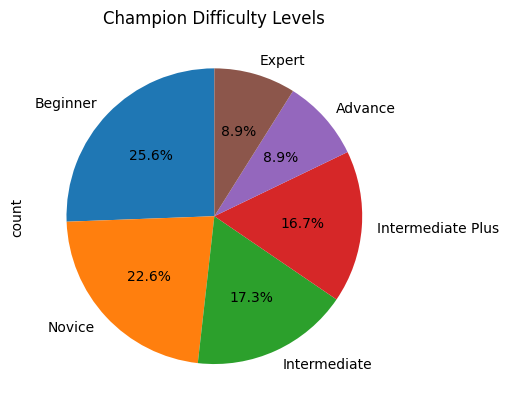

In [28]:
# Custom labels due to legend being too big and blocking pie chart
difficulty_custom_labels = ['Beginner', 'Novice', 'Intermediate', 'Intermediate Plus', 'Advance', 'Expert']

ax = champ_difficulty_count.plot.pie(
    y='Count',                     
    labels=difficulty_custom_labels,
    autopct='%1.1f%%',
    startangle=90,
    legend=False)

plt.title('Champion Difficulty Levels')

plt.show()


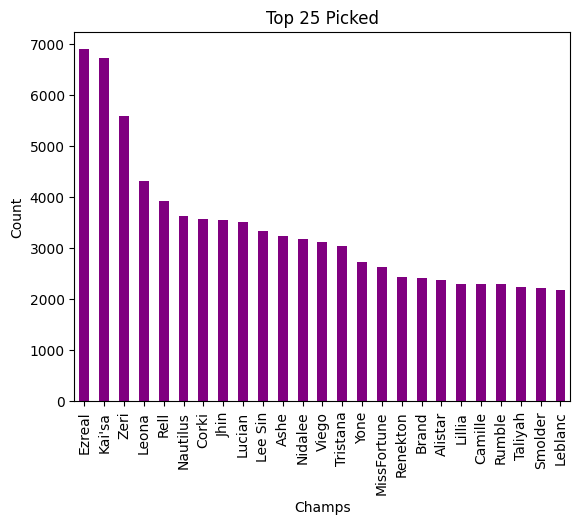

In [27]:
# Top 25 Banned Champs
top25_match_champ_count = match_champ_count.sort_values(ascending=False).head(25)

top25_match_champ_count.plot(x='Name',y='Count', kind='bar', color='purple')

plt.title('Top 25 Picked')
plt.xlabel('Champs')
plt.ylabel('Count')

plt.show()

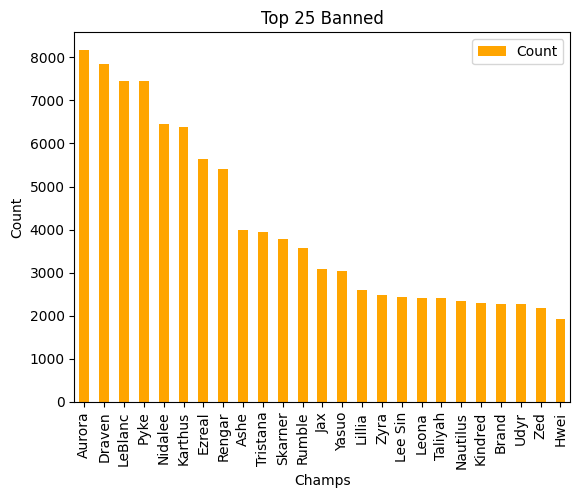

In [26]:
# Top 25 Banned Champs
top25_banned = top50_merged_banned.sort_values(by='Count', ascending=False).head(25)

top25_banned.plot(x='Name',y='Count', kind='bar', color='orange')

plt.title('Top 25 Banned')
plt.xlabel('Champs')
plt.ylabel('Count')

plt.show()

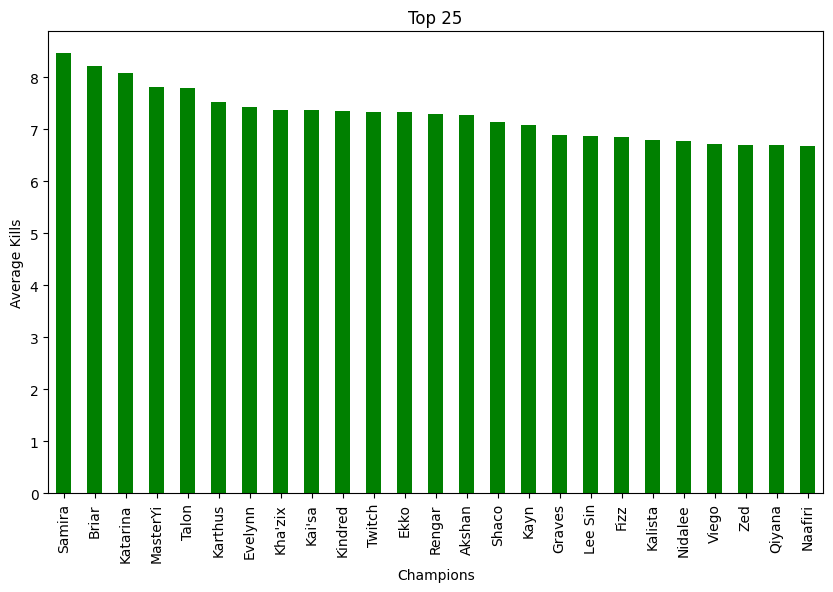

In [25]:
# Top 25 Kills
merged_kills_mean = merged_kills_mean.sort_values(by='Kills(Mean)', ascending=False).head(25)

ax = merged_kills_mean.plot(y='Kills(Mean)', kind='bar', figsize=(10, 6), color='green')

plt.title('Top 25')
plt.xlabel('Champions')
plt.ylabel('Average Kills')

ax.get_legend().set_visible(False)

plt.show()

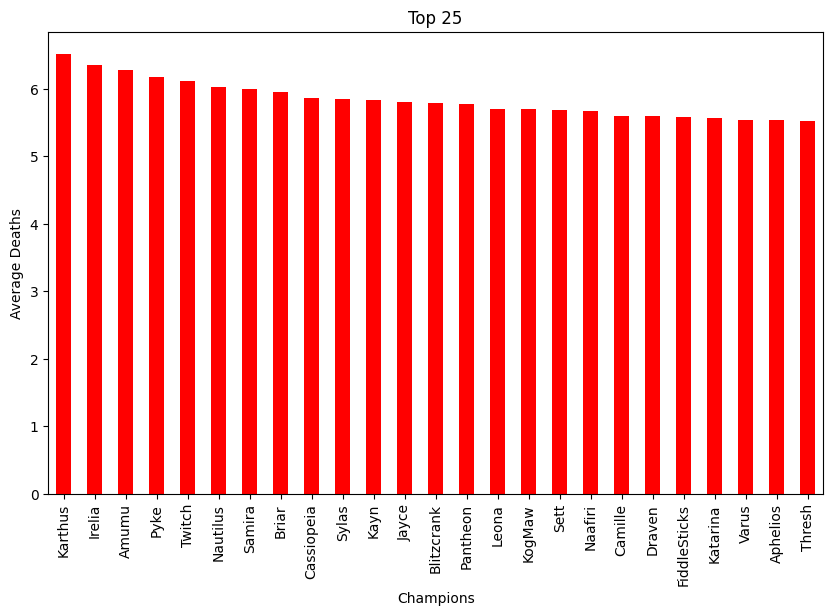

In [24]:
# Top 25 Deaths
merged_deaths_mean = merged_deaths_mean.sort_values(by='Deaths(Mean)', ascending=False).head(25)

ax = merged_deaths_mean.plot(y='Deaths(Mean)', kind='bar', figsize=(10, 6), color='red')

plt.title('Top 25')
plt.xlabel('Champions')
plt.ylabel('Average Deaths')

ax.get_legend().set_visible(False)

plt.show()

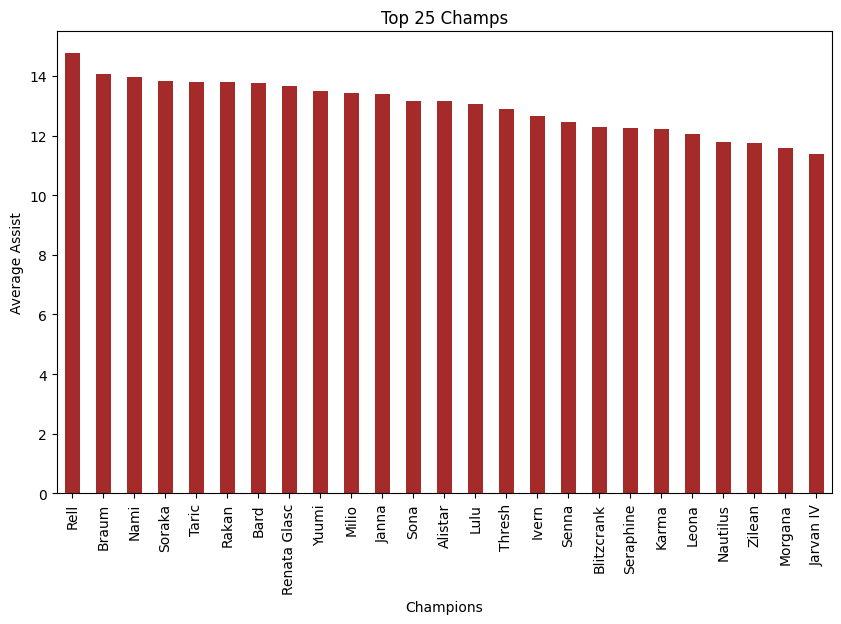

In [23]:
# Top 25 Assist Leaders
merged_assist_mean = merged_assist_mean.sort_values(by='Assist(Mean)', ascending=False).head(25)

ax = merged_assist_mean.plot(y='Assist(Mean)', kind='bar', figsize=(10, 6), color='brown')

plt.title('Top 25 Champs') 
plt.xlabel('Champions')   
plt.ylabel('Average Assist')

ax.get_legend().set_visible(False)

plt.show()

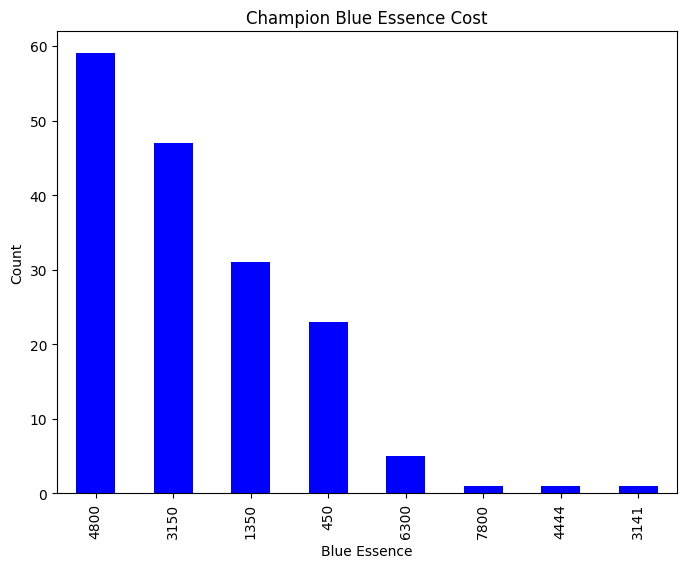

In [22]:
# Blue Essence Champ costs
ax = blue_essence_count.plot.bar(
    y='Count',
    x=blue_essence_count.index,
    legend=False,
    color='blue',
    figsize=(8, 6))

plt.title('Champion Blue Essence Cost')
plt.xlabel('Blue Essence')
plt.ylabel('Count')

plt.show()
